In [3]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Bootstrap

### Recap

In [4]:
sf_pop = Table.read_table('data/san_francisco_2015.csv').where('Total Compensation', are.above(10000))
sf_pop = sf_pop.where('Total Compensation', are.above(10*40*52))
sf_pop.show(3)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561


In [5]:
sf_pop.num_rows

35050

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


Population Median =  112965.15


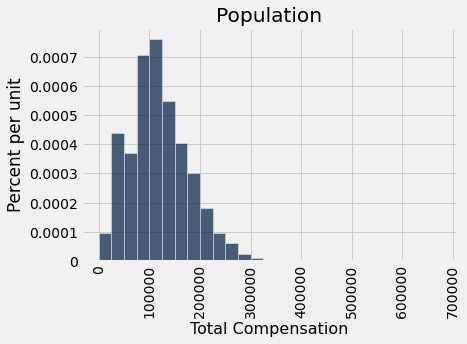

In [6]:
pop_median = percentile(50, sf_pop.column('Total Compensation'))
sf_bins = np.arange(0, 700000, 25000)
sf_pop.hist('Total Compensation', bins=sf_bins)
print("Population Median = ", pop_median)
plots.title('Population');

Population Median 112965.15
Sample Median =  116257.405


Text(0.5, 1.0, 'Our sample')

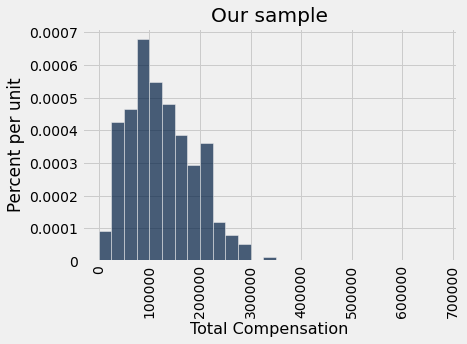

In [7]:
# Random sample of size 300
# can you generate a histogram similar to the one above, but for one random sample?

# Generate a sample of size 300
our_sample = sf_pop.sample(300, with_replacement = False)

# Extracting Total Compensation column as an array
our_sample_total_compensation_array = our_sample.column('Total Compensation')

# Calculate sample median
our_sample_median = np.median(our_sample_total_compensation_array)

# generate a histogram from our_sample table
our_sample.hist('Total Compensation', bins = sf_bins)

# print to the screen
# population parameter - median compensation
# sample statistic - median compensation
print('Population Median', pop_median)
print('Sample Median = ', our_sample_median)

# adding a title to plot
plots.title('Our sample')







In [9]:
# Empirical distribution of the sample median
# assuming we can just resample from the population


def one_sample_median():
    single_sample = sf_pop.sample(300, with_replacement = False)
    return percentile(50, single_sample.column('Total Compensation'))

medians = make_array()
for i in np.arange(1000):
    new_median = one_sample_median()
    medians = np.append(medians, new_median)

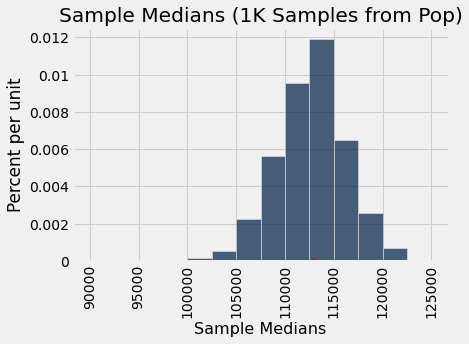

In [10]:
med_bins = np.arange(90000, 125001, 2500)

Table().with_column(
    'Sample Medians', medians
).hist('Sample Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.title('Sample Medians (1K Samples from Pop)');

### Bootstrap

Population Median =        112965.15
Our Sample Median =        116257.405
Bootstrap Sample Median =  122246.67


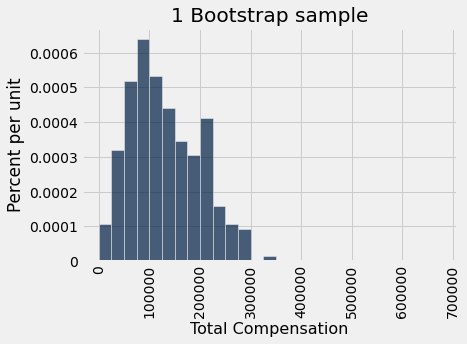

In [11]:
# Take a bootstrap (re)sample of size 300, WITH replacement
boot_sample = our_sample.sample(300, with_replacement=True)
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

In [12]:
# define a function here, called one_bootstrap_median
# that takes in no argument
# generates a bootstrap sample
# and returns the 50th percentile of Total compensation from the bootstrap sample



def one_bootstrap_median():
    single_sample = our_sample.sample() 
    return percentile(50, single_sample.column('Total Compensation'))



In [14]:
# Bootstrap our sample 1000 times
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)
    






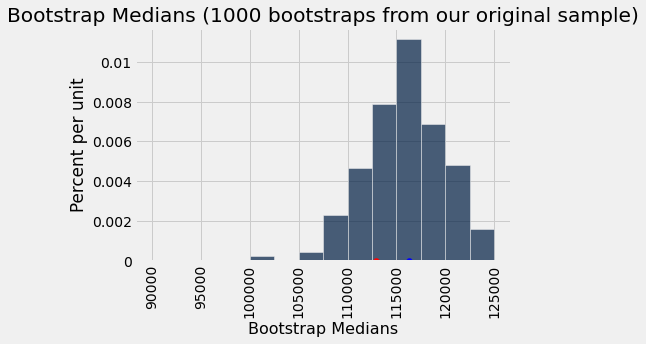

In [17]:
# add your bootstrap median array to a table
# so that you can generate a histogram

# bonus: add the population median, and the original sample median to the plot too, to compare
# bonus bonus, give your plot a descriptive title

Table().with_column(
    'Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins = med_bins)

plots.scatter(pop_median, 0, color='red');
plots.scatter(our_sample_median,0, color="blue");
plots.title('Bootstrap Medians (1000 bootstraps from our original sample)');







### 95% Confidence Interval

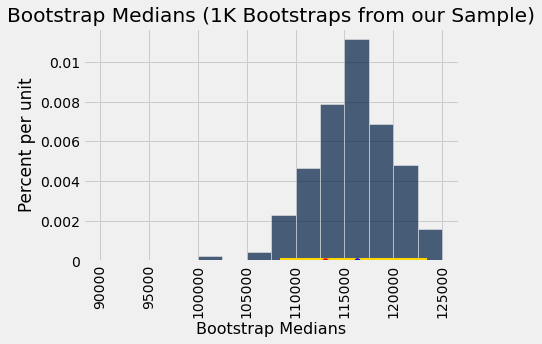

In [19]:
# Make an interval based on the middle 95% of bootstrap samples

# 97.5 - 2.5 = 95%
left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

# overlay our middle 95% confidence interval
plots.plot([left, right], [0,0], color="gold",lw=6, zorder=1); # lw = 6 instead of lw=3



plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

In [ ]:
# #Make an interval based on the middle 99% of bootstrap samples
# can you generate a plot similar to the one above?











## Another Example: Mean Maternal Age

In [ ]:
# This time we have a sample, but no population data!
births = Table.read_table('data/baby.csv')
births.show(5)

In [ ]:
births.hist('Maternal Age')

In [ ]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

In [ ]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [ ]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
    
# find the middle 95% confidence interval
# and plot below





In [ ]:
# plot your bootstrap means below 
# with the middle 95% confidence interval in "gold"
# also plot the mean_age







